In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical

In [21]:
# Ḷoading MNIST data into train and test
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [22]:
print(x_train.shape)

(60000, 28, 28)


In [23]:
print(x_test.shape)

(10000, 28, 28)


In [24]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [25]:
"""Normalization helps to ensure that the input features
(pixels in the case of images) have similar ranges and distributions, which can lead to more stable and efficient training."""
x_train=x_train/255.0
x_test=x_test/255.0

In [26]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [33]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [34]:
x_train.shape

(60000, 28, 28, 1)

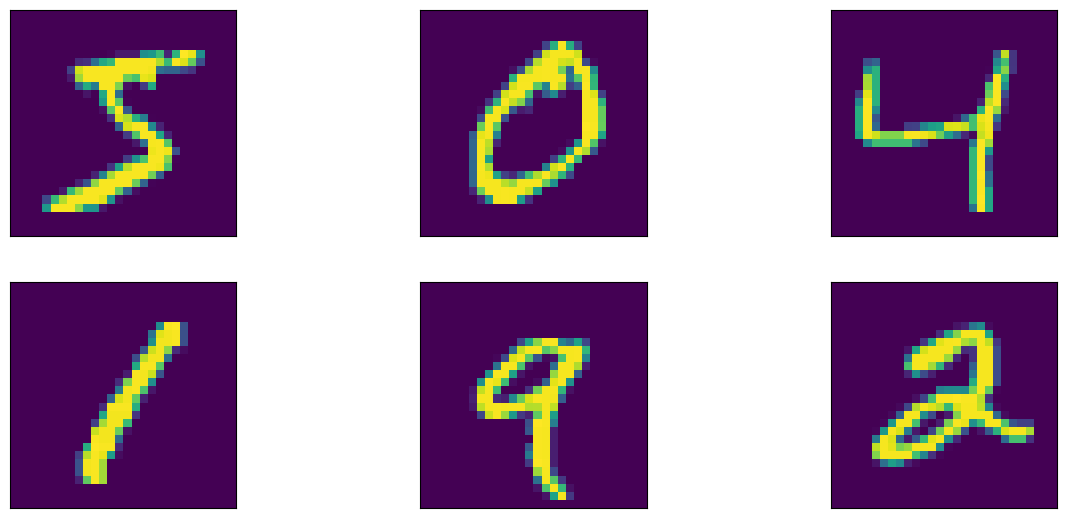

In [35]:
plt.figure(figsize=(15,10))
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show()

# Building LENET model

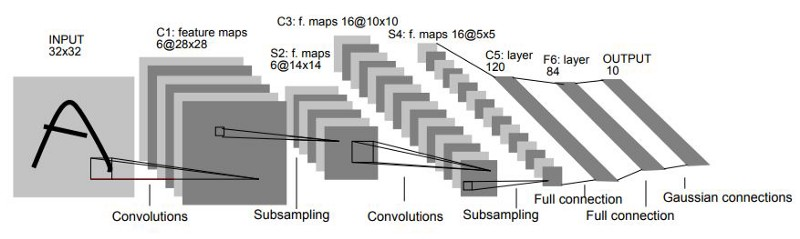

In [ ]:
"""The LeNet-5 architecture consists of two sets of convolutional and average pooling layers,
followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier."""

In [36]:
from keras import Sequential
from keras.layers import Conv2D, Dense ,Flatten , AveragePooling2D

In [37]:
# Initializing model
model=Sequential()
# first convolutional layer
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),padding='valid',activation='tanh',input_shape=( 28,28,1)))
# pooling layer 1
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

# Second convolutonal network
model.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),padding='valid',activation='tanh'))
# Pooling Layer 2
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

# Flatten
model.add(Flatten())

# Hidden Layer1
model.add(Dense(120,activation='tanh'))
# Hidden Layer2
model.add(Dense(84,activation='tanh'))
# Hidden Layer3
model.add(Dense(10,activation='softmax'))

# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [38]:
# Compiling
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train , validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 25s 51ms/step - loss: 0.3519 - accuracy: 0.8992 - val_loss: 0.1785 - val_accuracy: 0.9474
Epoch 2/10
469/469 [==============================] - 24s 52ms/step - loss: 0.1346 - accuracy: 0.9586 - val_loss: 0.1009 - val_accuracy: 0.9684
Epoch 3/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0904 - accuracy: 0.9720 - val_loss: 0.0810 - val_accuracy: 0.9734
Epoch 4/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0687 - accuracy: 0.9788 - val_loss: 0.0617 - val_accuracy: 0.9792
Epoch 5/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.0631 - val_accuracy: 0.9807
Epoch 6/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.0527 - val_accuracy: 0.9833
Epoch 7/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0504 - val_accuracy:

Text(0, 0.5, 'Accuracy')

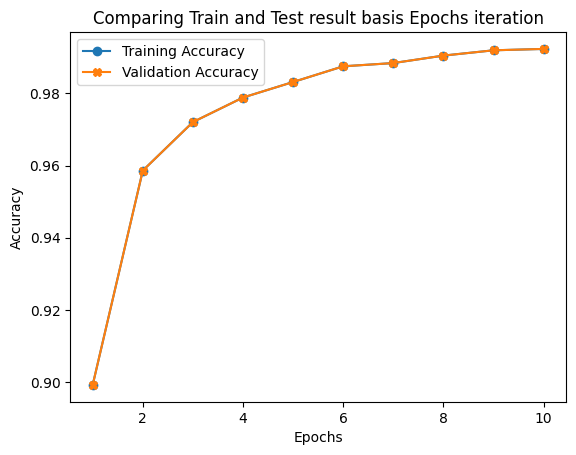

In [42]:
# visualize
f,ax=plt.subplots()
ax.plot([None]+history.history['accuracy'],'o-')
ax.plot([None]+history.history['accuracy'],'X-')

ax.legend(['Training Accuracy', 'Validation Accuracy'], loc=0)
ax.set_title("Comparing Train and Test result basis Epochs iteration")

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

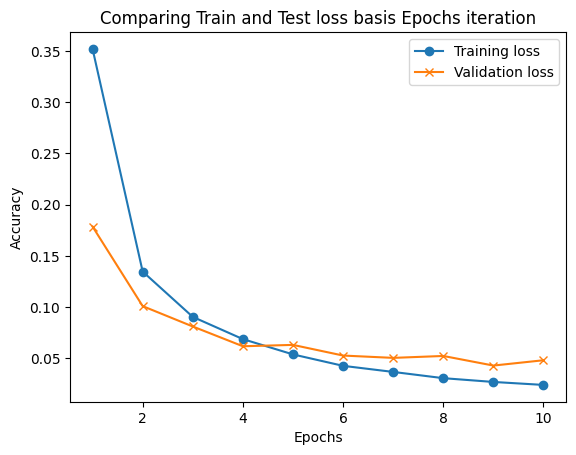

In [43]:
f, ax = plt.subplots()

ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')


ax.legend(['Training loss', 'Validation loss'], loc=0)
ax.set_title("Comparing Train and Test loss basis Epochs iteration")

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')